In [1]:
!pip install -q git+https://github.com/huggingface/transformers.git

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [2]:
!pip install -q datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 521.2/521.2 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 19.0 MB/s eta 0:00:00


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import torch
from transformers import AutoProcessor
from transformers import AutoModelForCausalLM
from transformers import BlipProcessor, BlipForConditionalGeneration

processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

#processor = AutoProcessor.from_pretrained("microsoft/git-base")
#model = AutoModelForCausalLM.from_pretrained("microsoft/git-base")

model.load_state_dict(torch.load('/content/drive/MyDrive/Colab Notebooks/nlp_course/nlp-team_project/blip_base_freeze_finetuned_model.pth'))
# model.eval()

preprocessor_config.json:   0%|          | 0.00/287 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/506 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/990M [00:00<?, ?B/s]

<All keys matched successfully>

In [5]:
from datasets import load_dataset

dataset = load_dataset("imagefolder", data_dir= '/content/drive/MyDrive/Colab Notebooks/nlp_course/nlp-team_project/LAVA_S01_016_test', split="train")

dataset

Resolving data files:   0%|          | 0/332 [00:00<?, ?it/s]

Extracting data files: 0it [00:00, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Dataset({
    features: ['image'],
    num_rows: 332
})

{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1280x720 at 0x7AC44CA0ACE0>}

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1280x720 at 0x7AC44CA0ACE0>


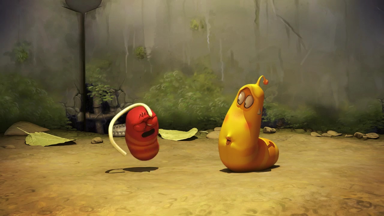

In [6]:
# load image
example = dataset[120]
print(example)
print()

image = example["image"]
print(image)
width, height = image.size
display(image.resize((int(0.3*width), int(0.3*height))))

In [7]:
import torch
from PIL import Image
import requests

# 모델을 올바른 장치로 이동
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model.to(device)

BlipForConditionalGeneration(
  (vision_model): BlipVisionModel(
    (embeddings): BlipVisionEmbeddings(
      (patch_embedding): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
    )
    (encoder): BlipEncoder(
      (layers): ModuleList(
        (0-11): 12 x BlipEncoderLayer(
          (self_attn): BlipAttention(
            (dropout): Dropout(p=0.0, inplace=False)
            (qkv): Linear(in_features=768, out_features=2304, bias=True)
            (projection): Linear(in_features=768, out_features=768, bias=True)
          )
          (layer_norm1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
          (mlp): BlipMLP(
            (activation_fn): GELUActivation()
            (fc1): Linear(in_features=768, out_features=3072, bias=True)
            (fc2): Linear(in_features=3072, out_features=768, bias=True)
          )
          (layer_norm2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        )
      )
    )
    (post_layernorm): LayerNorm((768,), eps=1e-0

In [9]:
all_captions = ""

for i in range(len(dataset)):

  image = dataset[i]["image"]
  # 입력 이미지
  inputs = processor(images=image, return_tensors="pt").to(device)
  pixel_values = inputs.pixel_values

  # 모델 실행
  generated_ids = model.generate(pixel_values=pixel_values, max_length=50)
  generated_caption = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]

  # 같은 문장은 1개만 허용
  if all_captions.count(generated_caption) < 2:
    all_captions += generated_caption + "\n"

print(all_captions)

red is standing with its mouth open, staring at the grown mushroom
red is standing with its mouth open, staring at the spaghetti noodle
red is standing with its mouth open, staring at the spaghetti noodle
red is closing eyes with its mouth on the spaghetti noodle
red is standing with its mouth open, tracing onto the spaghetti noodle
the spaghetti noodle is moving and red is surprised
the spaghetti noodle is moving and red is surprised
the spaghetti noodle is moving and red is jumping to noodle
red bites into the moving spaghetti noodle
red bites into the moving spaghetti noodle
yellow is eating a spaghetti noodle, and red, who is biting into the noodle, is being pulled toward yellow
yellow is eating a spaghetti noodle, and red, who is biting into the noodle, is being pulled toward yellow
red pulls the spaghetti noodle that yellow is biting it to free him
red pulled the spaghetti noodles and yellow panicked
red pulled the spaghetti noodles and yellow panicked
someone pulled the spaghett

In [10]:
from transformers import pipeline

summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [11]:
def split_string_in_thirds(s):
    third_length = len(s) // 3
    first_third = s[:third_length]
    second_third = s[third_length:2*third_length]
    third_third = s[2*third_length:]

    return first_third, second_third, third_third


first_third, second_third, third_third = split_string_in_thirds(all_captions)


sum1 = summarizer(first_third, max_length=200, min_length=30, do_sample=False)[0]['summary_text']
sum2 = summarizer(second_third, max_length=200, min_length=30, do_sample=False)[0]['summary_text']
sum3 = summarizer(third_third, max_length=200, min_length=30, do_sample=False)[0]['summary_text']

sum = summarizer(sum1+sum2+sum3, max_length=100, min_length=30, do_sample=False)
print(sum[0]['summary_text'])

The story is about a boy and a girl playing with spaghetti noodles. The boy tries to get the spaghetti noodles off his body and eats them. The girl eats the noodles on top of red.
